In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



Data collection and processing

In [2]:
 #loading the csv data to a pandas dataframe
 data=pd.read_csv('gld_price_data.csv')

In [3]:
#print frist 5 rows in the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows in the dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
#number of row and columns
data.shape

(2290, 6)

In [7]:
#getting some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


collelation
1.Positive Correlation
2.Negative Correlation

In [10]:
correlation=data.corr()

<AxesSubplot:>

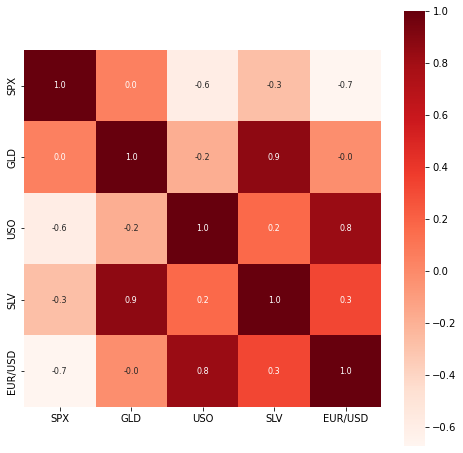

In [11]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [12]:
#correlation values of GLD
print(correlation ['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\nirma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

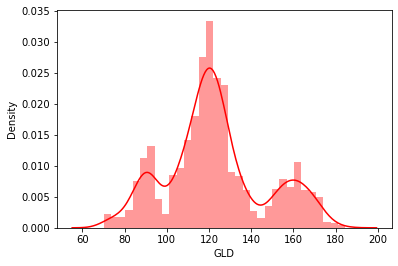

In [13]:
#checking the distribution of the GLD price
sns.distplot(data['GLD'],color='red')

<AxesSubplot:>

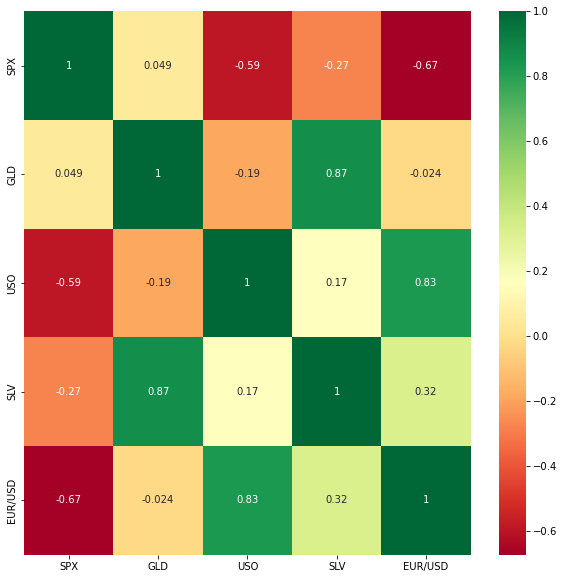

In [14]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

splitting the futures and target

In [15]:
X= data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into traing data and test data

In [18]:
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Traing : Random Forest Regressor

In [19]:
regressor= RandomForestRegressor(n_estimators=100)

In [20]:
#traing the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution

In [21]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.47939958  82.40779984 114.63390021 127.52670117 121.36380043
 153.8566     150.00019803 126.08590018 117.44809868 126.10009986
 116.42110134 172.04100082 141.25509858 167.93819927 115.15820033
 118.05600125 137.96850388 169.57660045 159.33260115 156.91809968
 155.16400034 125.99250011 174.47159954 156.6943036  125.18800036
  94.16        77.95280027 120.4540002  119.07979903 167.23540007
  88.40910081 125.42239997  91.21900045 117.63640038 121.03349987
 135.13829917 115.58070157 115.96560093 146.74959992 107.2502011
 104.34330157  87.07849807 126.39160018 117.96949987 151.41099887
 119.59760006 108.83909915 108.03019772  93.11210045 127.07039748
  73.84770029 113.56879927 120.25969913 111.31149903 118.95149914
 121.05129942 159.87490056 167.2653012  146.76949689  86.44819956
  94.29370026  86.86559941  90.95819997 118.87010081 126.3834004
 127.52699963 170.49150045 122.25479919 117.54589893  98.52739989
 167.73820148 143.15549785 132.26910396 121.11560117 122.411499
 119.88960065 

In [23]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9898523194997055


Compare the Actual Values and Predicted Values in Plot

In [24]:
Y_test=list(Y_test)

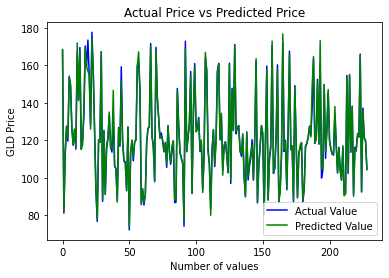

In [25]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()